In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [169]:
df = pd.read_csv('all_users_final_teen30_1.csv', 
                usecols=['user_id', 'sex', 'author_age', 
                         'num_of_texts', 'num_of_posts', 
                         'av_length_of_texts',
                         'av_texts_with_mat', 'av_media_usage', 
                         'av_emoji_usage', 'all_lemas'],
                converters={"all_lemas": lambda x: x.strip("[]").replace("'","").split(", ")})

In [39]:
len(df)

35289

In [40]:
df.head()

,user_id,sex,author_age,av_length_of_texts,num_of_texts,num_of_posts,av_texts_with_mat,av_media_usage,av_emoji_usage,all_lemas
0,58616431,1,20,63.545455,11,25,0.0,0.320000,0.103004,"[❤️🎄❤️🎄❤️🎄❤️🎵, ночь, перед, рождество, !, !, !..."
1,116307051,1,20,0.000000,0,1,0.0,0.000000,0.000000,[]
2,492766449,1,20,76.666667,3,8,0.0,1.000000,0.000000,"[частый, вопрос, про, журнал, «, актёр, 24, »,..."
3,18013947,1,20,62.391304,23,27,0.0,0.814815,0.068990,"[подводить, итог, год, ещё, слишком, рано, ,, ..."
4,50375903,1,20,19.200000,10,14,0.0,0.571429,0.062500,"[ребята, ,, ну, это, шедевр, думать, ,, это, з..."


In [44]:
df = df[df['num_of_texts']>2]

In [170]:
df = df[df['author_age']<19]

In [171]:
df = df[df['author_age']>13]

In [55]:
df = df.rename(columns={"av_texts_with_mat": "av_texts_with_swear"})

In [45]:
len(df)

6745

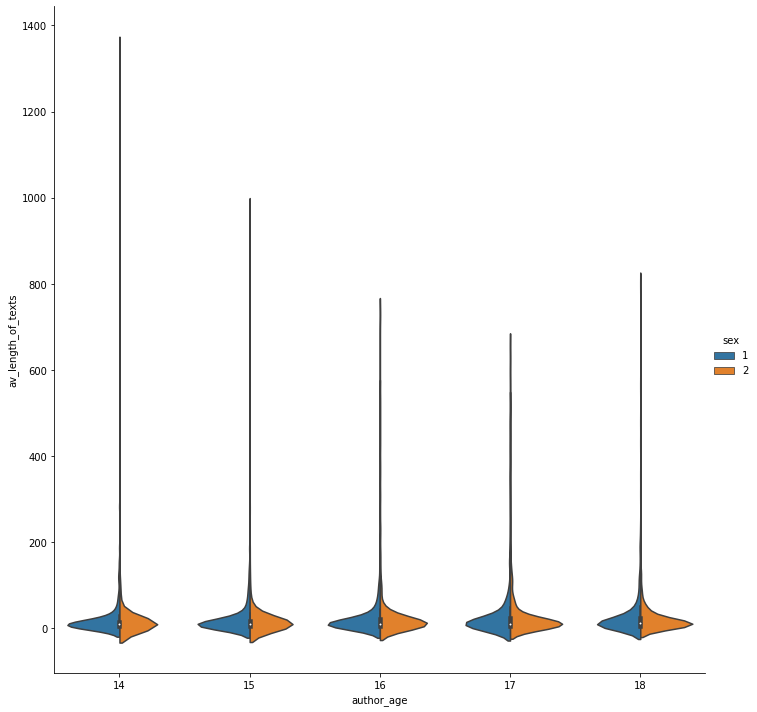

In [52]:
sns.catplot(x="author_age", y="av_length_of_texts", hue="sex",
            height=10,
            kind="violin", split=True, data=df);

//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2971: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


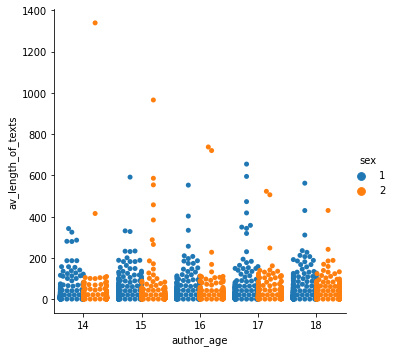

In [16]:
sns.catplot(x="author_age", y="av_length_of_texts", hue="sex",
            kind="swarm", split=True, data=df);

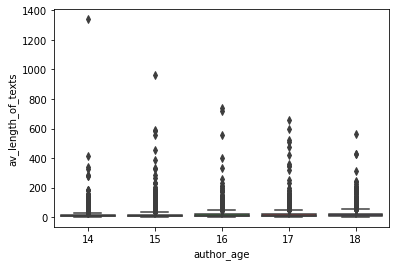

In [17]:
sns.boxplot(x="author_age", y="av_length_of_texts", data=df);

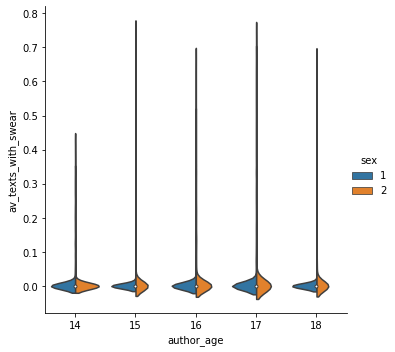

In [56]:
sns.catplot(x="author_age", y="av_texts_with_swear", hue="sex",
            kind="violin", split=True, data=df);

In [172]:
ages = [14, 15, 16, 17, 18]
sexes = [1, 2]

In [174]:
a = 0 
for age in ages:
    for sex in sexes:
        print(age, end = '')
        if sex==1:
            print(' жен ', end = '')
        else:
            print(' муж ', end = '')
        df_age = df[df['author_age']==age]
        df_age_sex = df_age[df_age['sex']==sex]
        print(df_age_sex['num_of_posts'].sum())
        a+=(df_age_sex['num_of_posts']).sum()


14 жен 19067
14 муж 18719
15 жен 22809
15 муж 22440
16 жен 20089
16 муж 17727
17 жен 20785
17 муж 16745
18 жен 26914
18 муж 25077


In [176]:
a

210372

In [61]:
df_by_ages_dict = {}
for age in ages:
    df_by_ages_dict[age] = df[df['author_age']==age]

In [62]:
df14 = df[df['author_age']==14]
df15 = df[df['author_age']==15]
df16 = df[df['author_age']==16]
df17 = df[df['author_age']==17]
df18 = df[df['author_age']==18]

In [63]:
df_dict = {
    14: df14,
    15: df15,
    16: df16,
    17: df17,
    18: df18
}

In [64]:
len(df14)

1193

In [65]:
data = df14['av_length_of_texts']


In [69]:
from scipy import stats

In [97]:
stats.ks_2samp(df17['av_voc/text_total_length'], df18['av_voc/text_total_length'])

Ks_2sampResult(statistic=0.13361742722886247, pvalue=3.3273873767392104e-08)

In [71]:
df_badwords = pd.DataFrame(columns=ages, index=ages)

for age1 in ages:
    for age2 in ages:
        df_age1 = df_by_ages_dict[age1]['av_texts_with_swear']
        df_age2 = df_by_ages_dict[age2]['av_texts_with_swear']
        df_badwords[age1][age2] = stats.ks_2samp(df_age1, df_age2)[1]
df_badwords

,14,15,16,17,18
14,1,0.999991,0.988976,0.535498,0.458192
15,0.999991,1,0.999769,0.871223,0.695591
16,0.988976,0.999769,1,0.992301,0.97165
17,0.535498,0.871223,0.992301,1,1
18,0.458192,0.695591,0.97165,1,1


In [76]:
df_badwords.to_excel('av_texts_with_swear.xlsx')

In [73]:
df_length_of_texts = pd.DataFrame(columns=ages, index=ages)

for age1 in ages:
    for age2 in ages:
        df_age1 = df_by_ages_dict[age1]['av_length_of_texts']
        df_age2 = df_by_ages_dict[age2]['av_length_of_texts']
        df_length_of_texts[age1][age2] = stats.ks_2samp(df_age1, df_age2)[1]
df_length_of_texts

,14,15,16,17,18
14,1,0.0460008,5.5943e-09,9.17474e-09,2.22933e-13
15,0.0460008,1,0.000689708,0.000196118,1.93877e-07
16,5.5943e-09,0.000689708,1,0.274355,0.102032
17,9.17474e-09,0.000196118,0.274355,1,0.578993
18,2.22933e-13,1.93877e-07,0.102032,0.578993,1


In [78]:
df_length_of_texts.to_excel('av_length_of_texts.xlsx')

In [74]:
df_media_usage = pd.DataFrame(columns=ages, index=ages)

for age1 in ages:
    for age2 in ages:
        df_age1 = df_by_ages_dict[age1]['av_media_usage']
        df_age2 = df_by_ages_dict[age2]['av_media_usage']
        df_media_usage[age1][age2] = stats.ks_2samp(df_age1, df_age2)[1]
df_media_usage

,14,15,16,17,18
14,1,0.898864,1.93057e-06,2.9976e-15,1.66533e-15
15,0.898864,1,1.70898e-05,3.96059e-19,1.29295e-38
16,1.93057e-06,1.70898e-05,1,2.20529e-06,3.55271e-15
17,2.9976e-15,3.96059e-19,2.20529e-06,1,0.00351659
18,1.66533e-15,1.29295e-38,3.55271e-15,0.00351659,1


In [77]:
df_media_usage.to_excel('av_media_usage.xlsx')

In [75]:
df_emoji_usage = pd.DataFrame(columns=ages, index=ages)

for age1 in ages:
    for age2 in ages:
        df_age1 = df_by_ages_dict[age1]['av_emoji_usage']
        df_age2 = df_by_ages_dict[age2]['av_emoji_usage']
        df_emoji_usage[age1][age2] = stats.ks_2samp(df_age1, df_age2)[1]
df_emoji_usage

,14,15,16,17,18
14,1,0.264798,0.34805,0.000655545,3.48164e-05
15,0.264798,1,0.0130747,2.19851e-06,7.07937e-08
16,0.34805,0.0130747,1,0.015993,0.00102003
17,0.000655545,2.19851e-06,0.015993,1,0.845578
18,3.48164e-05,7.07937e-08,0.00102003,0.845578,1


In [79]:
df_emoji_usage.to_excel('av_emoji_usage.xlsx')

In [201]:
median_of_av_length_of_texts

{14: 8.45804195804196,
 15: 9.0,
 16: 10.916666666666664,
 17: 10.425531914893618,
 18: 11.585714285714285}

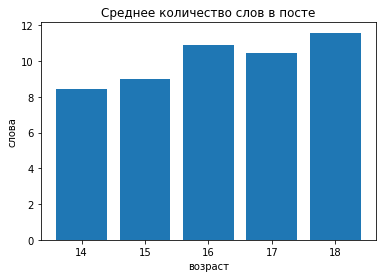

In [210]:
#plt.plot(*zip(median_of_av_length_of_texts.items()))
plt.bar(ages, median_of_av_length_of_texts.values())
plt.title('Среднее количество слов в посте')
plt.xlabel('возраст')
plt.ylabel('слова')
plt.savefig('mean_words_in_post')
plt.show()

In [211]:
median_of_av_media_usage = {}

median_of_av_media_usage[14] = df14['av_media_usage'].median()
median_of_av_media_usage[15] = df15['av_media_usage'].median()
median_of_av_media_usage[16] = df16['av_media_usage'].median()
median_of_av_media_usage[17] = df17['av_media_usage'].median()
median_of_av_media_usage[18] = df18['av_media_usage'].median()

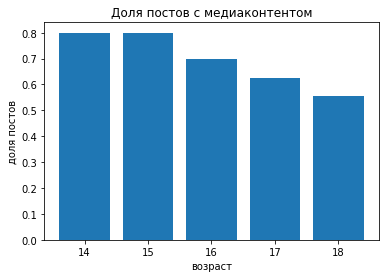

In [215]:
plt.bar(ages, median_of_av_media_usage.values())
plt.title('Доля постов с медиаконтентом')
plt.xlabel('возраст')
plt.ylabel('доля постов')
plt.savefig('median_of_av_media_usage')
plt.show()

In [216]:
median_of_av_emoji_usage = {}

median_of_av_emoji_usage[14] = df14['av_emoji_usage'].median()
median_of_av_emoji_usage[15] = df15['av_emoji_usage'].median()
median_of_av_emoji_usage[16] = df16['av_emoji_usage'].median()
median_of_av_emoji_usage[17] = df17['av_emoji_usage'].median()
median_of_av_emoji_usage[18] = df18['av_emoji_usage'].median()

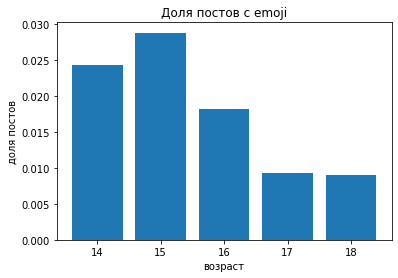

In [218]:
plt.bar(ages, median_of_av_emoji_usage.values())
plt.title('Доля постов с emoji')
plt.xlabel('возраст')
plt.ylabel('доля постов')
plt.savefig('median_of_av_emoji_usage')
plt.show()

In [58]:
mean_of_av_texts_with_mat = {}

mean_of_av_texts_with_mat[14] = df14['av_texts_with_swear'].mean()
mean_of_av_texts_with_mat[15] = df15['av_texts_with_swear'].mean()
mean_of_av_texts_with_mat[16] = df16['av_texts_with_swear'].mean()
mean_of_av_texts_with_mat[17] = df17['av_texts_with_swear'].mean()
mean_of_av_texts_with_mat[18] = df18['av_texts_with_swear'].mean()

NameError: name 'df14' is not defined

In [224]:
mean_of_av_texts_with_mat

{14: 0.006221747253792426,
 15: 0.0066484832949392355,
 16: 0.008497490668839305,
 17: 0.01065533379163439,
 18: 0.009473460551128849}

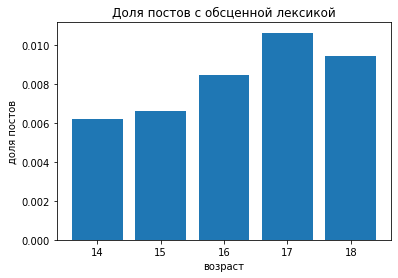

In [226]:
plt.bar(ages, mean_of_av_texts_with_mat.values())
plt.title('Доля постов с обсценной лексикой')
plt.xlabel('возраст')
plt.ylabel('доля постов')
plt.savefig('mean_of_av_texts_with_mat')
plt.show()

In [122]:
ages = [14, 15, 16, 17, 18]
sexes = [1, 2]

In [80]:
total_texts_len = {}
for age in ages:
    df_by_age = df[df['author_age']==age]
    total_texts_len[age] = 0
    for lemmas in df_by_age['all_lemas']:
        total_texts_len[age] += len(lemmas)

In [81]:
total_texts_len

{14: 258673, 15: 326114, 16: 275547, 17: 335011, 18: 433860}

In [84]:
import collections

In [82]:
lemmas_voc_by_age = {}

for age in ages:
    lemmas_voc_by_age[age] = []
    all_age_posts = df[df['author_age']==age]
    for lemmas in all_age_posts['all_lemas']:
        lemmas_voc_by_age[age].extend(lemmas)

In [85]:
lemmas_voc_by_age_count = {}
for age in ages:
    lemmas_voc_by_age_count[age]=collections.Counter(lemmas_voc_by_age[age])

In [86]:
#lemmas_voc_by_age_count_norm = {k: f(v) for k, v in d1.items()}
lemmas_voc_by_age_count_norm = {}

for age in ages:
    lemmas_voc_by_age_count_norm[age] = {k: (v/total_texts_len[age])*1000
                                         for k, v in lemmas_voc_by_age_count[age].items()}

In [87]:
len(lemmas_voc_by_age_count_norm[15])

32839

In [146]:
lemmas_freq14 = list(lemmas_voc_by_age_count[14].values())

In [88]:
for age in ages:
    lemmas_voc_by_age_count_norm[age] = dict(lemmas_voc_by_age_count_norm[age])
    lemmas_voc_by_age_count_norm[age] = {k: v for k, v in sorted(lemmas_voc_by_age_count_norm[age].items(), 
                                                                 key=lambda item: item[1],
                                                                 reverse=True)}

In [89]:
lemmas_voc_by_age_count_norm[14]

{':': 71.78174761184971,
 ',': 57.04112914761108,
 '.': 32.56234705593548,
 '!': 20.72500802171081,
 'я': 20.060075848658347,
 'и': 19.522717871598502,
 'в': 19.433802522876373,
 ')': 13.665902510118952,
 'не': 12.189134544386155,
 'на': 10.54999942011729,
 '?': 9.691773010712366,
 'с': 8.976584336208264,
 'что': 8.856741909669736,
 '#': 7.6699152984656305,
 'весь': 7.592597603924646,
 'быть': 7.2871927104877585,
 'это': 7.155752629768085,
 ']': 6.50241811089677,
 '[': 6.49855222616972,
 'ты': 6.378709799631195,
 '-': 5.5436786985885655,
 '(': 5.435433926231188,
 'а': 5.064308992434464,
 'вы': 4.863282986627905,
 'мой': 4.538548669555771,
 'он': 4.097837810672162,
 'как': 3.95866596049839,
 'но': 3.9316047674090453,
 '...': 3.8774823812303567,
 'за': 3.8426894186869136,
 '""': 3.7305787616024864,
 'мы': 3.6687246059696994,
 '``': 3.351722058351664,
 'у': 3.1816231303614986,
 'который': 2.9689994703737925,
 'этот': 2.941938277284448,
 'https': 2.9110111994680543,
 'один': 2.806632311837

In [90]:
lemmas_voc_by_age_count_norm[15]

{',': 66.18544435381492,
 '.': 35.355734497752316,
 'я': 20.787209380768687,
 'и': 20.207657444942566,
 'в': 19.345995572100552,
 '!': 17.503081744420665,
 'не': 14.45813427206437,
 ')': 13.231569328517022,
 'на': 11.078947852591424,
 'с': 9.613202745052345,
 'что': 9.153240891222087,
 '?': 9.015252335073011,
 'быть': 8.794470645234489,
 '[': 8.515427120577467,
 ']': 8.515427120577467,
 'это': 8.466364522835573,
 '#': 8.303844667815548,
 ':': 7.690562196041875,
 'весь': 7.635366773582245,
 '-': 6.203352201990715,
 '(': 6.129758305377874,
 'ты': 5.712726224571775,
 'а': 5.632999503241198,
 'мы': 4.682411671992003,
 'вы': 4.526024641689716,
 'но': 4.492294105742164,
 '...': 4.489227693383295,
 'мой': 4.256180354109299,
 'как': 4.062996375500592,
 'за': 3.8974101081217,
 'он': 3.685827655359782,
 '╬═╬': 3.6244994081824147,
 'который': 3.4650459655212593,
 '🤡': 3.455846728444654,
 'по': 3.409850543061629,
 '""': 3.36998718239634,
 'этот': 3.302526110501236,
 'один': 3.2749283992714204,
 'у

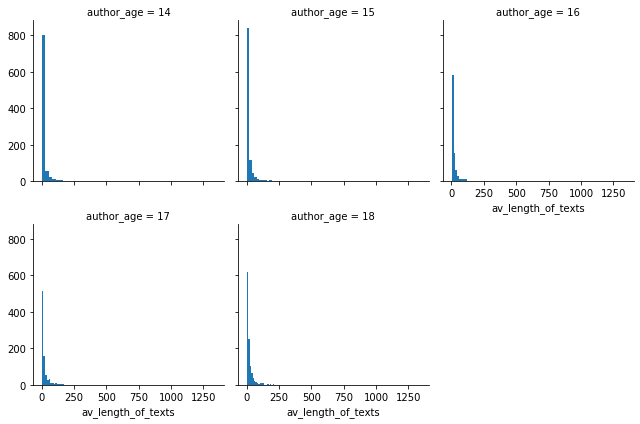

In [301]:
import seaborn as sns

g = sns.FacetGrid(df, col="author_age", col_wrap=3,height=3)
g = (g.map(plt.hist, "av_length_of_texts", bins=50))

In [305]:
lemmas_voc_by_age_count_norm_df = pd.DataFrame(lemmas_voc_by_age_count_norm)

In [323]:
lemmas_voc_by_age_count_norm_df = lemmas_voc_by_age_count_norm_df.T

In [324]:
lemmas_voc_by_age_count_norm_df.head()

,,!,"""""","""100000000""","""18""","""19""","""42""","""5nizza""","""_人彡ﾉ""","""b""",...,🧸🐥,🧸💖,🧸🔗🕊,🧸🧒,🧸🧸🧸,🧻,🧽,🩰,🩸🦠it,🪐🪐
14,4.824350,20.669698,3.541550,NaN,0.017047,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.004262,NaN,NaN,NaN,NaN,NaN
15,4.271420,17.192467,3.559517,NaN,NaN,0.00356,NaN,NaN,NaN,NaN,...,0.00356,NaN,NaN,NaN,NaN,0.00356,NaN,0.00356,NaN,NaN
16,5.080388,17.194131,3.461070,0.004449,NaN,NaN,NaN,NaN,0.004449,NaN,...,NaN,0.004449,NaN,NaN,NaN,NaN,NaN,NaN,0.004449,NaN
17,4.139802,12.554740,3.678282,NaN,0.003470,NaN,NaN,0.00347,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00347,NaN,NaN,0.00347
18,4.130139,13.865257,3.609088,NaN,NaN,NaN,0.002944,NaN,NaN,0.002944,...,NaN,NaN,0.002944,0.002944,NaN,NaN,NaN,NaN,NaN,NaN


In [315]:
only_lemmas_by_age = {}
for age in ages:
    only_lemmas_by_age[age] = list(lemmas_voc_by_age_count_norm[age].values())

In [316]:
import pyupset as pyu
from pickle import load

pyu.plot(only_lemmas_by_age)

AttributeError: 'list' object has no attribute 'columns'

In [ ]:
pd.plotting.scatter_matrix(lemmas_voc_by_age_count_norm_df, figsize=(20, 20));

In [342]:
data.iloc[0]
lemmas_voc_by_age_count_norm_dic = {}
lemmas_voc_by_age_count_norm_dic[14] = lemmas_voc_by_age_count_norm_df.iloc[0].to_frame().T.reset_index()
lemmas_voc_by_age_count_norm_dic[15] = lemmas_voc_by_age_count_norm_df.iloc[1].to_frame().T.reset_index()

In [332]:
lemmas_voc_by_age_count_norm_dic[14].columns

AttributeError: 'Series' object has no attribute 'columns'

In [344]:
for age in ages:
    print(len(lemmas_voc_by_age_count_norm[age]))

24814
28551
26326
29646
35277


In [91]:
for age in ages:
    x = lemmas_voc_by_age_count_norm[age]
    lemmas_voc_by_age_count_norm[age] = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}

In [92]:
lemmas_voc_by_age_count_norm[14]

{':': 71.78174761184971,
 ',': 57.04112914761108,
 '.': 32.56234705593548,
 '!': 20.72500802171081,
 'я': 20.060075848658347,
 'и': 19.522717871598502,
 'в': 19.433802522876373,
 ')': 13.665902510118952,
 'не': 12.189134544386155,
 'на': 10.54999942011729,
 '?': 9.691773010712366,
 'с': 8.976584336208264,
 'что': 8.856741909669736,
 '#': 7.6699152984656305,
 'весь': 7.592597603924646,
 'быть': 7.2871927104877585,
 'это': 7.155752629768085,
 ']': 6.50241811089677,
 '[': 6.49855222616972,
 'ты': 6.378709799631195,
 '-': 5.5436786985885655,
 '(': 5.435433926231188,
 'а': 5.064308992434464,
 'вы': 4.863282986627905,
 'мой': 4.538548669555771,
 'он': 4.097837810672162,
 'как': 3.95866596049839,
 'но': 3.9316047674090453,
 '...': 3.8774823812303567,
 'за': 3.8426894186869136,
 '""': 3.7305787616024864,
 'мы': 3.6687246059696994,
 '``': 3.351722058351664,
 'у': 3.1816231303614986,
 'который': 2.9689994703737925,
 'этот': 2.941938277284448,
 'https': 2.9110111994680543,
 'один': 2.806632311837

In [160]:
lemmas_voc_by_age_count_norm_1000 = {}
for age in ages:
    lemmas_voc_by_age_count_norm_1000[age] = {}
    for x in list(lemmas_voc_by_age_count_norm[age])[0:5000]:
        lemmas_voc_by_age_count_norm_1000[age][x] = lemmas_voc_by_age_count_norm[age][x]

In [161]:
len(lemmas_voc_by_age_count_norm_1000[14])

5000

In [162]:
lemmas_voc_by_age_intersect = {}
for age1 in ages:
    lemmas_voc_by_age_intersect[age1] = {}
    for age2 in ages:
        age1_lemmas = set(lemmas_voc_by_age_count_norm_1000[age1])
        age2_lemmas = set(lemmas_voc_by_age_count_norm_1000[age2])
        lemmas_voc_by_age_intersect[age1][age2] = len(age1_lemmas.intersection(age2_lemmas))

In [163]:
pd.DataFrame(lemmas_voc_by_age_intersect).to_excel('lemmas_voc_by_age_intersect.xlsx')

In [164]:
a14 = set(lemmas_voc_by_age_count_norm_1000[14])
a15 = set(lemmas_voc_by_age_count_norm_1000[15])
a16 = set(lemmas_voc_by_age_count_norm_1000[16])
a17 = set(lemmas_voc_by_age_count_norm_1000[17])
a18 = set(lemmas_voc_by_age_count_norm_1000[18])

In [165]:
len(a14&a15&a16&a17&a18)

2597

In [140]:
import builtins
int = builtins.int
int(5)

5

In [144]:
intr = get_venn_sections([a14, a15, a16])

In [166]:
pd.DataFrame(lemmas_voc_by_age_intersect)

,14,15,16,17,18
14,5000,3392,3335,3257,3352
15,3392,5000,3502,3434,3466
16,3335,3502,5000,3583,3658
17,3257,3434,3583,5000,3763
18,3352,3466,3658,3763,5000


In [110]:
from matplotlib_venn import venn3

In [153]:
for i in intr:
    print(i[0])
    print(len(i[1]))

111
691
011
93
101
73
001
143
110
76
010
140
100
160


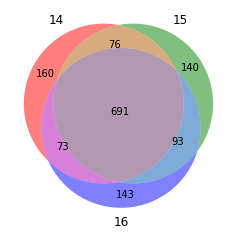

In [154]:
venn3(subsets = (160, 140, 76, 143, 73, 93, 691), set_labels = ('14', '15', '16'), alpha = 0.5)
plt.show()

In [167]:
lemmas_voc_by_age_ks = {}
for age1 in ages:
    lemmas_voc_by_age_ks[age1] = {}
    for age2 in ages:
        age1_lemmas = list(lemmas_voc_by_age_count_norm_1000[age1].values())
        age2_lemmas = list(lemmas_voc_by_age_count_norm_1000[age2].values())
        lemmas_voc_by_age_ks[age1][age2] = stats.ks_2samp(age1_lemmas, age2_lemmas)[1]

In [100]:
pd.DataFrame(lemmas_voc_by_age_ks).to_excel('lemmas_voc_by_age_ks.xlsx')

In [168]:
pd.DataFrame(lemmas_voc_by_age_ks)

,14,15,16,17,18
14,1.000000e+00,2.128011e-32,4.698546e-23,1.322278e-28,5.925964e-60
15,2.128011e-32,1.000000e+00,1.300271e-25,5.260255e-10,5.475271e-35
16,4.698546e-23,1.300271e-25,1.000000e+00,9.019357e-24,6.498096e-22
17,1.322278e-28,5.260255e-10,9.019357e-24,1.000000e+00,2.795227e-16
18,5.925964e-60,5.475271e-35,6.498096e-22,2.795227e-16,1.000000e+00


In [387]:
from statistics import median
from statistics import variance

In [388]:
lemmas_voc_by_age_median = {}
for age in ages:
    age_lemmas = list(lemmas_voc_by_age_count_norm_1000[age].values())
    lemmas_voc_by_age_median[age] = variance(age_lemmas)

In [389]:
lemmas_voc_by_age_median

{14: 12.871583361274514,
 15: 8.412045003990409,
 16: 9.40757981985976,
 17: 10.783213190158355,
 18: 10.085463524448414}

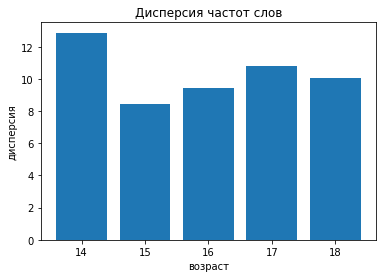

In [393]:
plt.bar(ages, lemmas_voc_by_age_median.values())
plt.title('Дисперсия частот слов')
plt.xlabel('возраст')
plt.ylabel('дисперсия')
#plt.savefig('median_of_av_emoji_usage')
plt.show()

In [400]:
distr_voc_by_age = {}
for age in ages:
    distr_voc_by_age[age] = list(lemmas_voc_by_age_count_norm_1000[age].values())

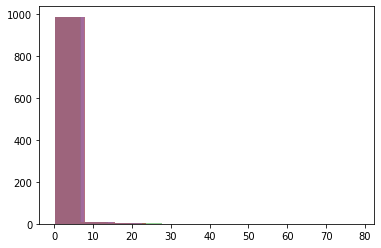

In [401]:
for age in ages:
    plt.hist(distr_voc_by_age_ks[age], bins=10, alpha=0.5)
#plt.hist(distr_voc_by_age_ks[14], bins=50, alpha=0.5)
#plt.hist(distr_voc_by_age_ks[15], bins=50, alpha=0.5)
plt.show()

In [402]:
data = pd.DataFrame(distr_voc_by_age)

In [404]:
data.head()

,14,15,16,17,18
0,78.225219,66.000562,69.279226,78.451513,75.260967
1,55.590834,34.513076,39.495342,40.096746,38.646092
2,32.048687,20.371115,23.279920,24.932507,24.256840
3,20.669698,19.862104,21.077825,22.375060,21.148196
4,19.855696,19.705486,20.601817,20.303424,20.730178


In [130]:
def get_venn_sections(sets):
    """
    Given a list of sets, return a new list of sets with all the possible
    mutually exclusive overlapping combinations of those sets.  Another way
    to think of this is the mutually exclusive sections of a venn diagram
    of the sets.  If the original list has N sets, the returned list will
    have (2**N)-1 sets.

    Parameters
    ----------
    sets : list of set

    Returns
    -------
    combinations : list of tuple
        tag : str
            Binary string representing which sets are included / excluded in
            the combination.
        set : set
            The set formed by the overlapping input sets.
    """
    num_combinations = 2 ** len(sets)
    bit_flags = [2 ** n for n in range(len(sets))]
    flags_zip_sets = [z for z in zip(bit_flags, sets)]

    combo_sets = []
    for bits in range(num_combinations - 1, 0, -1):
        include_sets = [s for flag, s in flags_zip_sets if bits & flag]
        exclude_sets = [s for flag, s in flags_zip_sets if not bits & flag]
        combo = set.intersection(*include_sets)
        combo = set.difference(combo, *exclude_sets)
        tag = ''.join([str(int((bits & flag) > 0)) for flag in bit_flags])
        combo_sets.append((tag, combo))
    return combo_sets